In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Set the range for years
years = np.arange(1960, 2021)

# Assumed Growth Rates and Starting Points
initial_population = 5000000  # Initial population in 1960
population_growth_rate = 0.012  # 1.2% annual growth
diabetes_rate = 0.02  # Initial diabetes rate (2% of the population)
male_to_female_ratio = 0.6  # 60% male, 40% female diabetic patients initially
aqi_start = 30  # Starting AQI in 1960
aqi_increase_rate = 1.15  # AQI worsens by 0.15 points per year
health_index_start = 0.75  # Initial health index in 1960
health_index_decline_rate = 0.02  # Health index declines over time due to pollution

In [14]:
# Create synthetic data for the years
population = initial_population * (1 + population_growth_rate) ** (years - 1960)
diabetic_patients = population * diabetes_rate
male_diabetic_patients = diabetic_patients * male_to_female_ratio
female_diabetic_patients = diabetic_patients * (1 - male_to_female_ratio)
aqi = aqi_start + aqi_increase_rate * (years - 1960)
health_index = health_index_start - health_index_decline_rate * (years - 1960)

In [15]:
# Create the DataFrame
data = pd.DataFrame({
    'Year': years,
    'Population': population.astype(int),
    'Number of Diabetic Patients': diabetic_patients.astype(int),
    'Number of Male Diabetic Patients': male_diabetic_patients.astype(int),
    'Number of Female Diabetic Patients': female_diabetic_patients.astype(int),
    'Pollution Level (AQI)': aqi,
    'Health Index': health_index
})
data.head()

,Year,Population,Number of Diabetic Patients,Number of Male Diabetic Patients,Number of Female Diabetic Patients,Pollution Level (AQI),Health Index
0,1960,5000000,100000,60000,40000,30.00,0.75
1,1961,5060000,101200,60720,40480,31.15,0.73
2,1962,5120720,102414,61448,40965,32.30,0.71
3,1963,5182168,103643,62186,41457,33.45,0.69
4,1964,5244354,104887,62932,41954,34.60,0.67


In [16]:
data.tail()

,Year,Population,Number of Diabetic Patients,Number of Male Diabetic Patients,Number of Female Diabetic Patients,Pollution Level (AQI),Health Index
56,2016,9751663,195033,117019,78013,94.40,-0.37
57,2017,9868683,197373,118424,78949,95.55,-0.39
58,2018,9987107,199742,119845,79896,96.70,-0.41
59,2019,10106952,202139,121283,80855,97.85,-0.43
60,2020,10228236,204564,122738,81825,99.00,-0.45


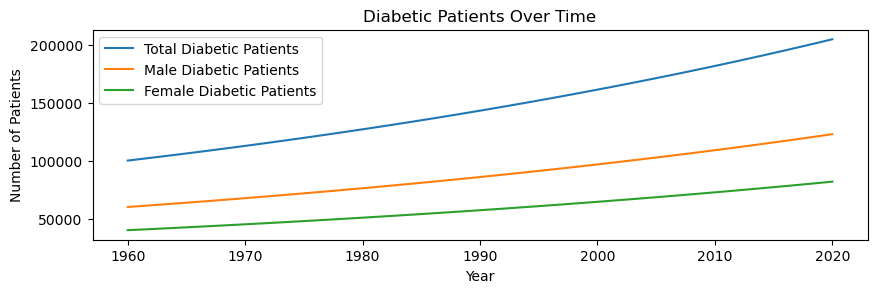

In [17]:
# Optional: Plot some of the columns to visualize trends
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(years, data['Number of Diabetic Patients'], label='Total Diabetic Patients')
plt.plot(years, data['Number of Male Diabetic Patients'], label='Male Diabetic Patients')
plt.plot(years, data['Number of Female Diabetic Patients'], label='Female Diabetic Patients')
plt.title('Diabetic Patients Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Patients')
plt.legend()

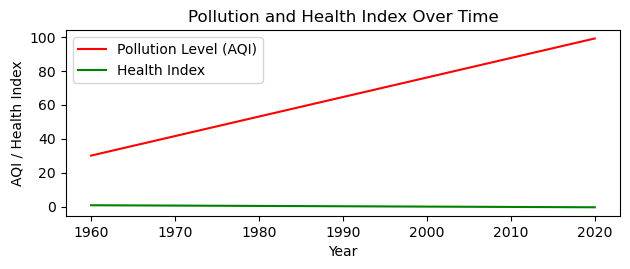

In [18]:
plt.subplot(2, 1, 2)
plt.plot(years, data['Pollution Level (AQI)'], label='Pollution Level (AQI)', color='red')
plt.plot(years, data['Health Index'], label='Health Index', color='green')
plt.title('Pollution and Health Index Over Time')
plt.xlabel('Year')
plt.ylabel('AQI / Health Index')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# Saving the dataset to a CSV file
data.to_csv('synthetic_diabetes_data.csv', index=False)